In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lesson 1: What is plt.subplots?

## Parameters in plt.subplots

In [2]:
?plt.subplots

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

## plt.subplts with examples

### plt.subplots(row, column, figsize=(width in inches, height in inches))

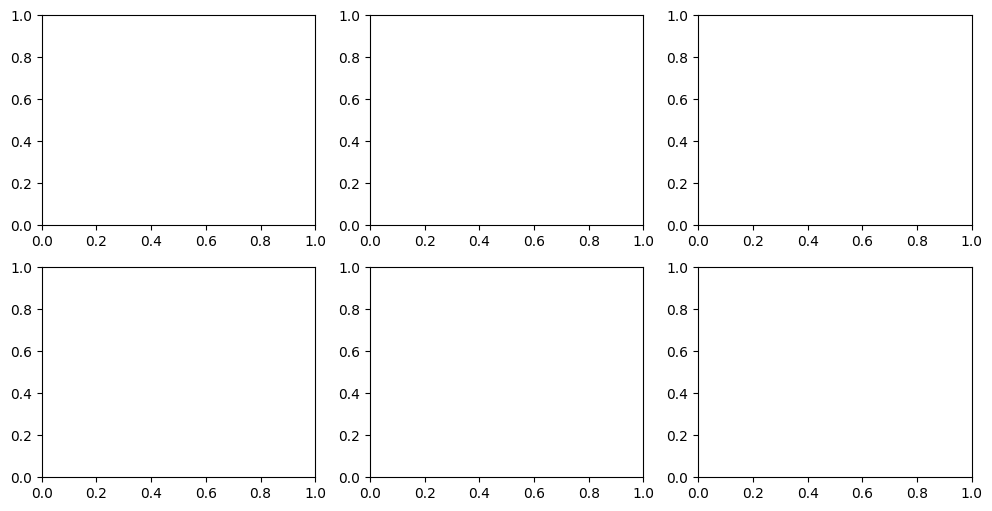

In [3]:
fig, ax = plt.subplots(2,3, figsize=(12, 6))

### fig: the canvas

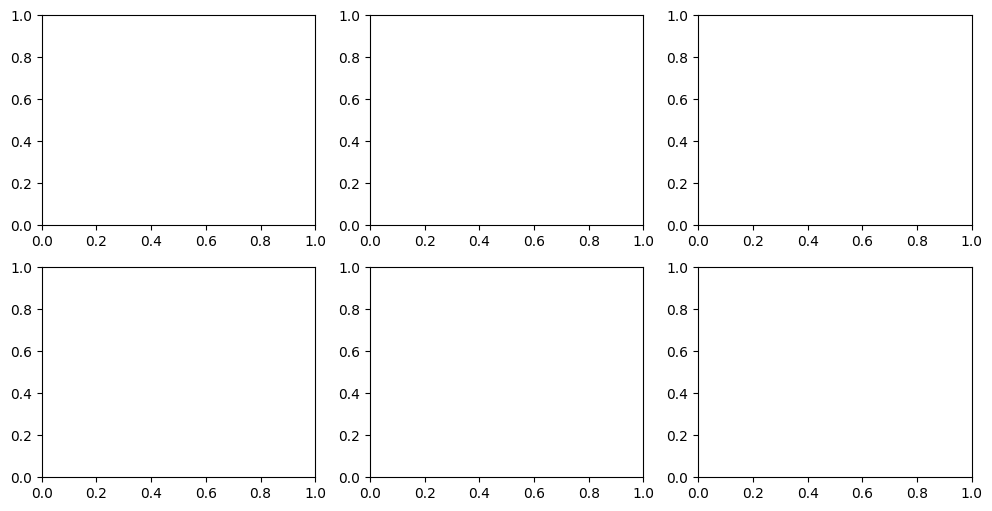

In [4]:
fig

### ax: the array of Axes objects

In [5]:
# This is what's inside ax
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [6]:
# This makes ax into 1D array for easy iteration
ax.ravel()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

In [7]:
x = [1,2,3,4,5]
y = [2,3,4,5,6]

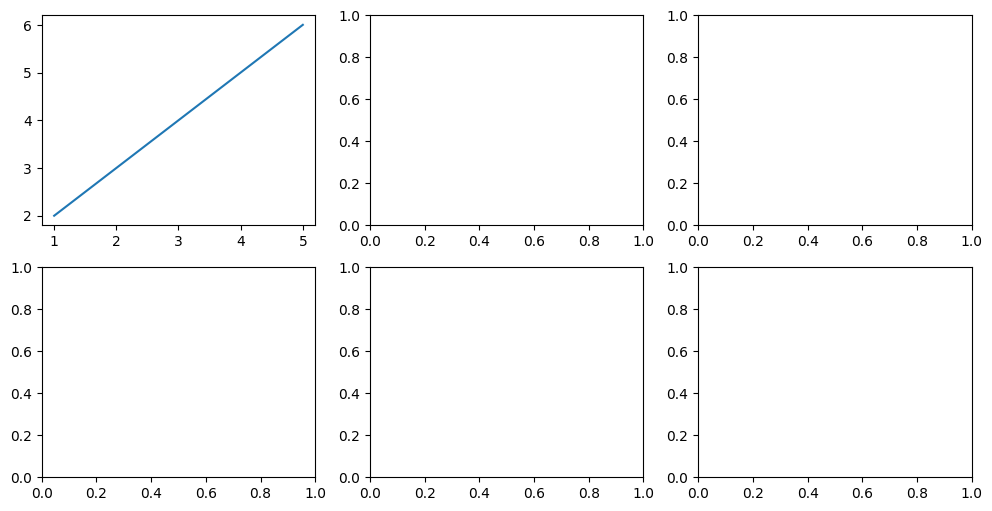

In [8]:
# ax[row, column], here it's in at the top-left as row=0, column=0

ax[0,0].plot(x,y)
fig

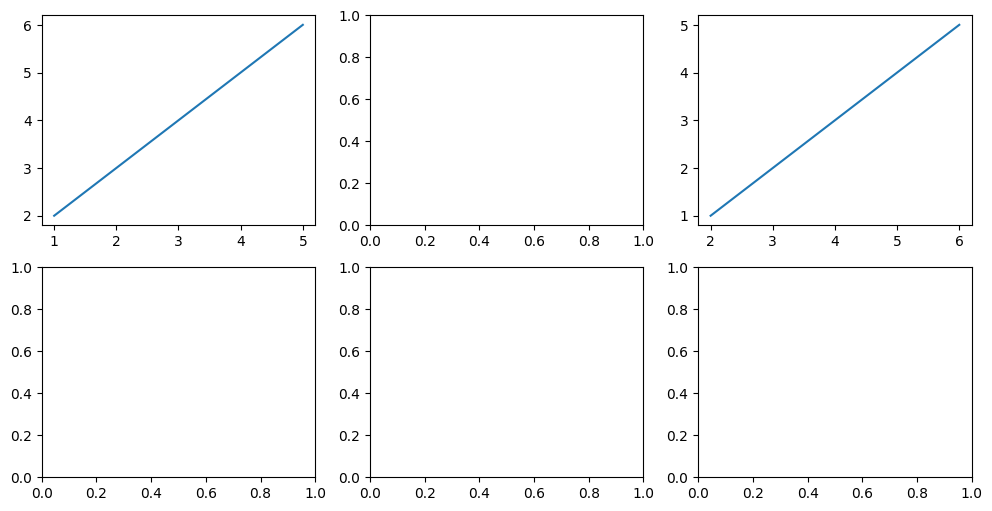

In [9]:
# ax[row, column], here it's in at the top-right as row=0, column=2. Remember python indexing starts at 0.

ax[0, 2].plot(y,x)
fig

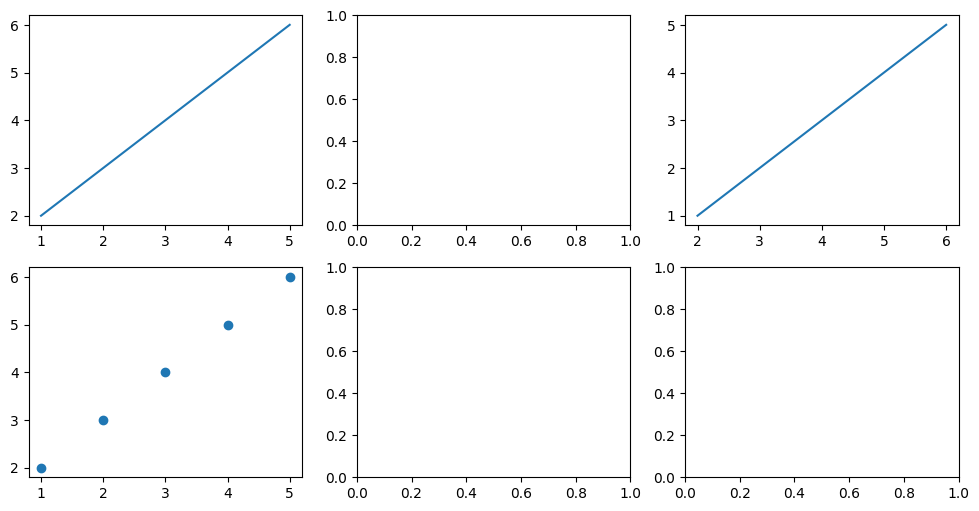

In [10]:
# ax.ravel() makes it easier to access each subplot as a 1D array. It flatters the 2D array into 1D starting from top-left (0,0) to bottom-right (1,2).
# in this case, ax[3] corresponds to row=1, column=0.

ax = ax.ravel()
ax[3].scatter(x, y)
fig

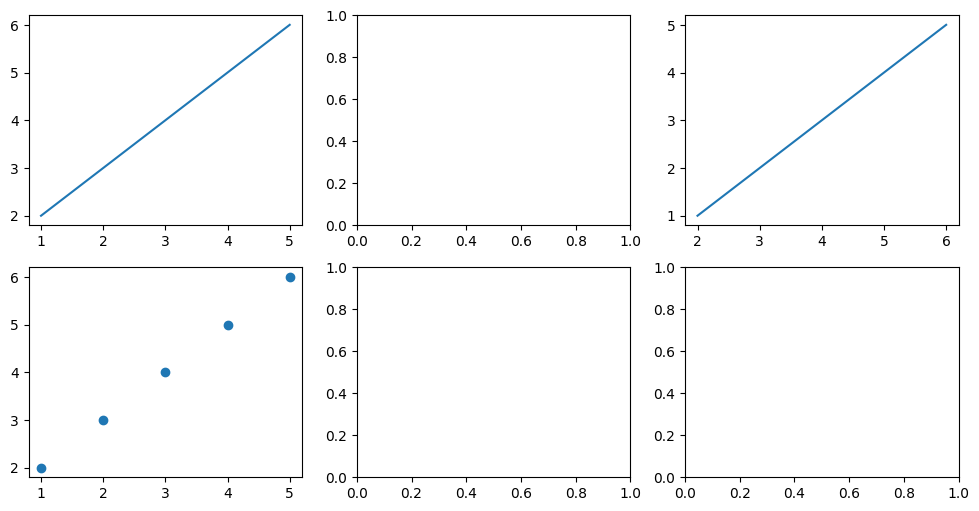

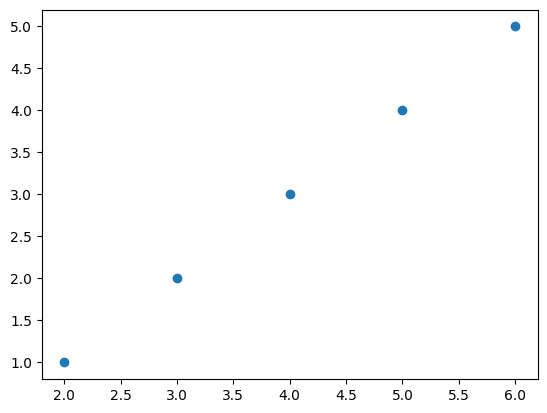

In [11]:
# notice when we don't use ax[4].plot and use plt.scatter directly, it plots on a new figure instead of the intended subplot.
# so always use ax[index] to plot on specific subplot.

ax[4] = plt.scatter(y, x)
fig

In [12]:
# This is what ax array looks like. At index 4, we have a scatter plot instead of a  Plt.Axes object as in other indices.
ax

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

## Manipulating the overall figure

In [13]:
?fig

Type:           Figure
String form:    Figure(1200x600)
File:           d:\fun-with-visualize\.venv\lib\site-packages\matplotlib\figure.py
Docstring:     
The top level container for all the plot elements.

See `matplotlib.figure` for an index of class methods.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
    Dots per inch.

facecolor : default: :rc:`figure.facecolor`
    The figure patch facecolor.

edgecolor : default: :rc:`figure.edgecolor`
    The figure patch edge color.

linewidth : float
    The linewidth of the frame (i

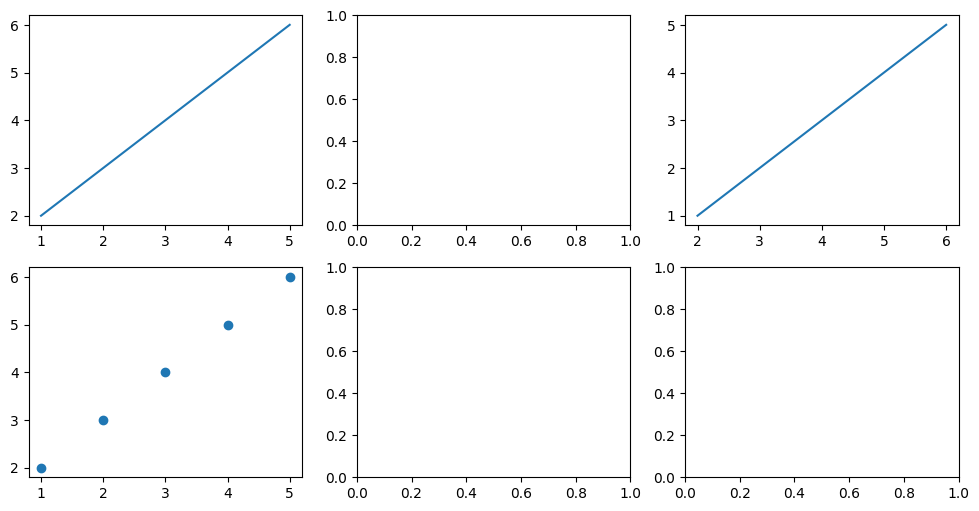

In [14]:
fig.figure

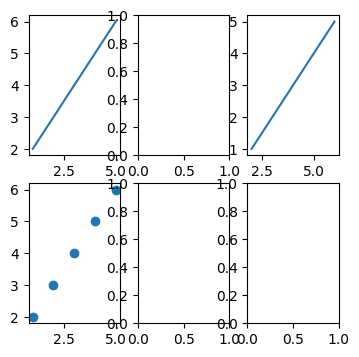

In [15]:
fig.set_size_inches(4,4)
fig

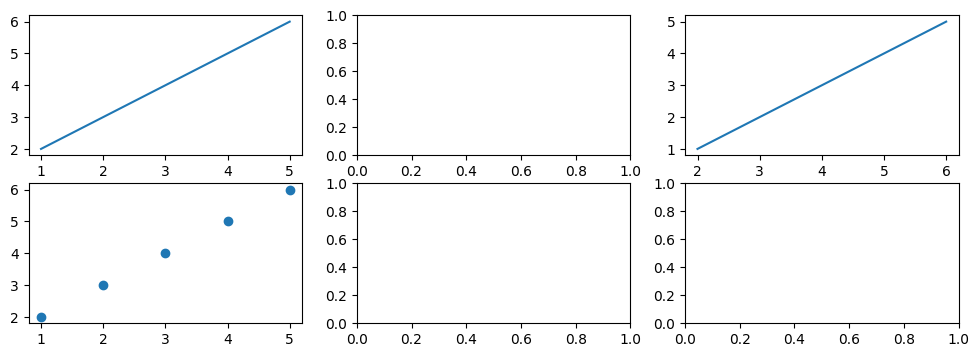

In [16]:
fig.set_size_inches(12,4)
fig

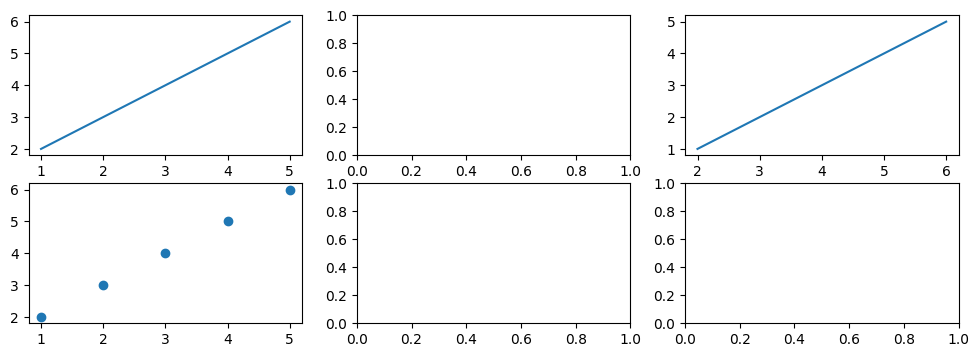

In [17]:
fig

# Lesson 2: Matplotlib is the big daddy of seaborn

## seaborn examples

<Axes: >

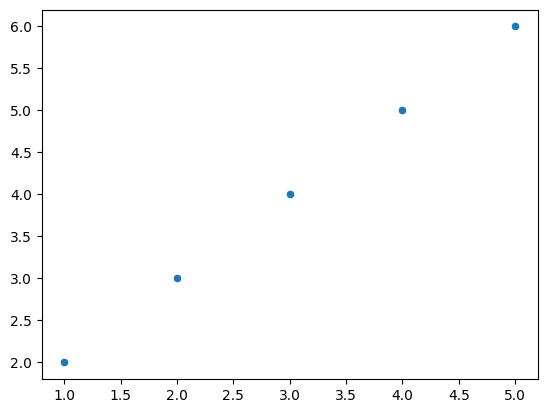

In [18]:
import seaborn as sns

# look at <Axes:>
sns.scatterplot(x=x, y=y)

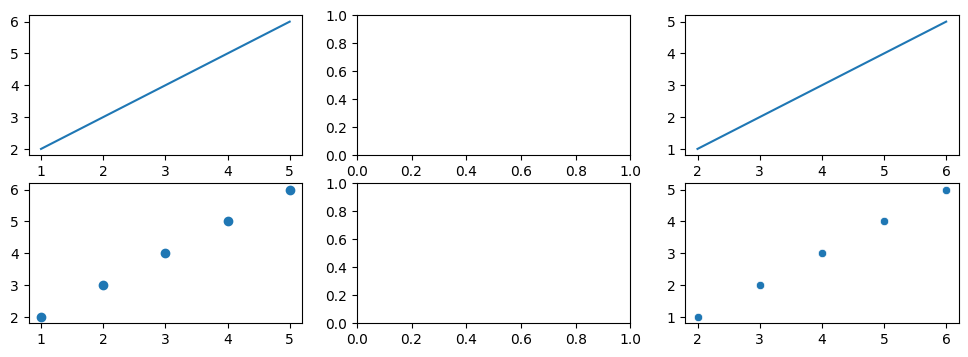

In [19]:
# if we pass ax with a specific index in seaborn

# Run this three times and see the color of the bottom-right.
sns.scatterplot(x=y, y=x, ax=ax[5])

# this is fig from the Lesson 1
fig

# Lesson 3: if you want to manipulate current matplotlib figure, but you don't have the fig variable.  

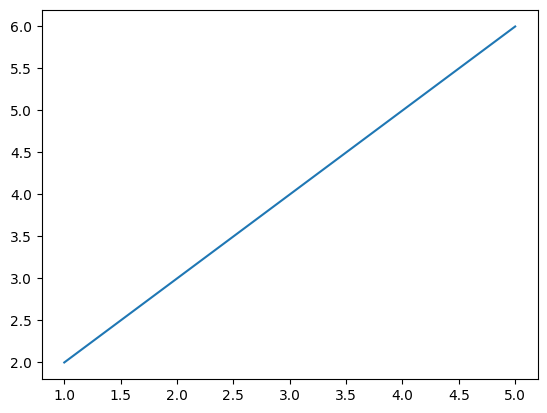

In [20]:
plt.plot(x, y)

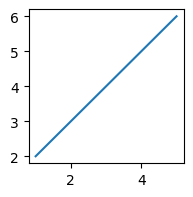

In [21]:
plt.plot(x,y)
plt.gcf().set_size_inches(2,2)

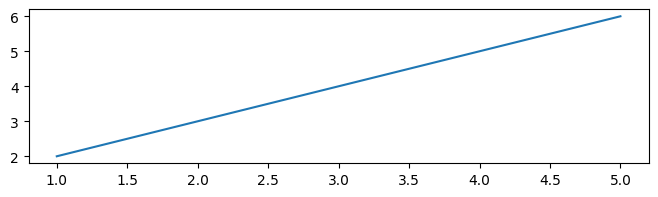

In [22]:
plt.plot(x, y)
mock_fig = plt.gcf()  # get current figure
mock_fig.set_size_inches(8, 2)

# Lesson 4: matplotlib basic plots

## line plot

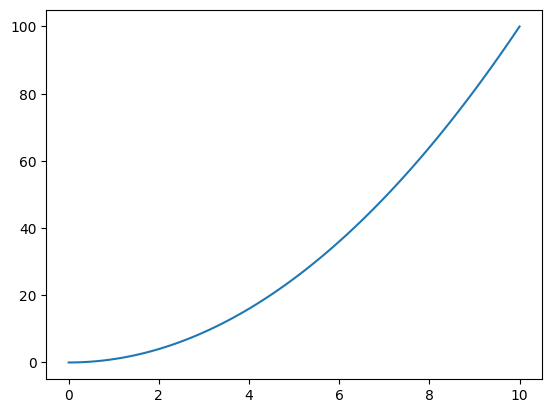

In [23]:
# plot only one line
x = np.linspace(0, 10, 100)

plt.plot(x, x**2)
plt.show()

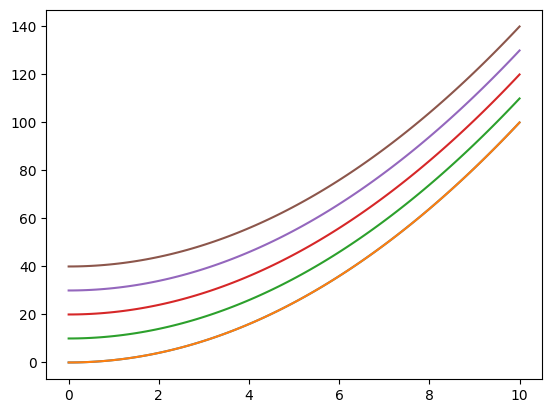

In [24]:
# plot many lines, which can come from either the same or different sources

plt.plot(x,x**2)
for i in range(5):
    plt.plot(x, (x**2)+(i*10))
plt.show()

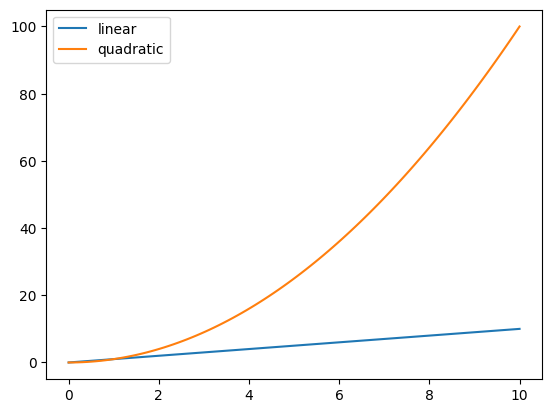

In [25]:
# To prevent confusion, we can give each line a label and use plt.legend() to show the legend.

plt.plot(x, x, label="linear") # linear
plt.plot(x, x**2, label="quadratic") # quadratic

plt.legend()
plt.show()

### Tips: plt.legend(loc=n)

    ==================   =============
    Location String      Location Code
    ==================   =============
    'best' (Axes only)   0
    'upper right'        1
    'upper left'         2
    'lower left'         3
    'lower right'        4
    'right'              5
    'center left'        6
    'center right'       7
    'lower center'       8
    'upper center'       9
    'center'             10
    ==================   =============

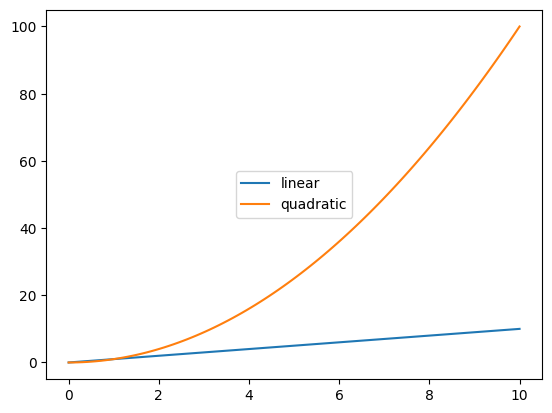

In [26]:
# If we want to control the legend location, try plt.legend(loc=n)
# p.s. legend can control more than location, consulting the official document is a good start.

plt.plot(x, x, label="linear") # linear
plt.plot(x, x**2, label="quadratic") # quadratic

plt.legend(loc=10)
plt.show()

### Tips: plt.(x|y)ticks(ticks, labels=`<your choice>`, rotation=n)

**Remark**: 
- ticks and labels must be in the same size
- ticks is just indices, so you can set it suitable for your use case

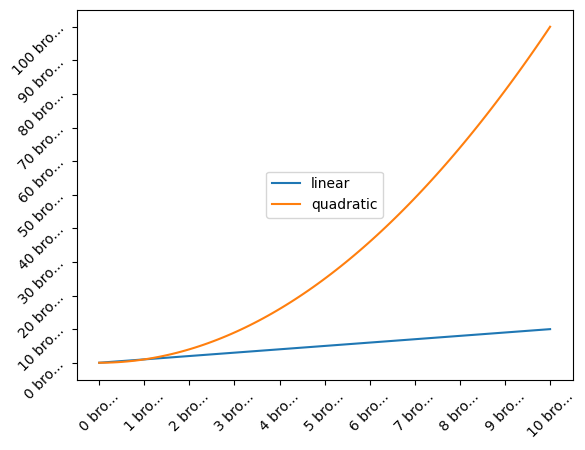

In [27]:
plt.plot(x, x, label="linear") # linear
plt.plot(x, x**2, label="quadratic") # quadratic

plt.xticks(ticks=range(0, 11, 1), labels=[f"{i} bro..." for i in range(0,11,1)], rotation=45)
plt.yticks(ticks=range(0, 101, 10), labels=[f"{i} bro..." for i in range(0,101,10)], rotation=45)
plt.legend(loc=10)
plt.show()

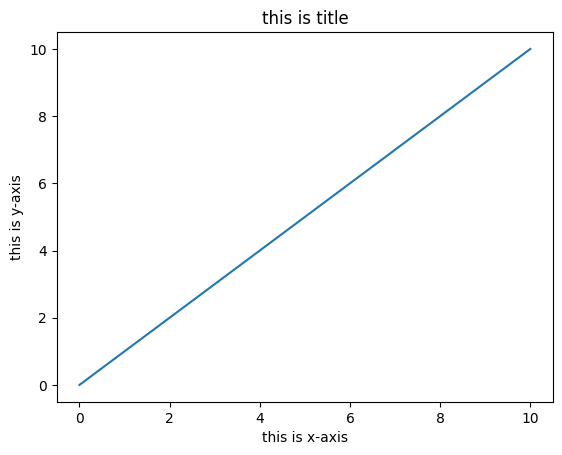

In [28]:
### Tips: plt.xlabel(), plt.ylabel(), plt.title()

x = np.linspace(0, 10, 100)

plt.plot(x, x, label="linear") # linear
plt.xlabel("this is x-axis")
plt.ylabel("this is y-axis")

plt.title("this is title")
plt.show()

### Tips: dual-axis with twinx and twiny

**Remark**
- twinx means you share the same x-axis, but have different y-axis
- twiny means you share the same y-axis, but have different x-axis

**Note**: mostly you will use only twinx

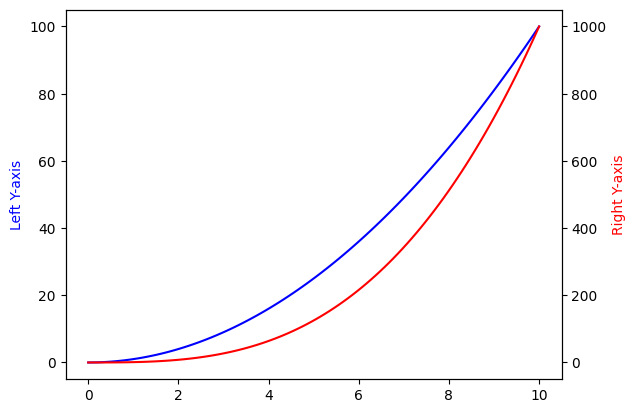

In [29]:
x = np.linspace(0, 10, 100)
y1 = x**2
y2 = x**3

fig, ax1 = plt.subplots()

# First y-axis (left)
ax1.plot(x, y1, 'b-')
ax1.set_ylabel('Left Y-axis', color='b')

# Second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Right Y-axis', color='r')

plt.show()


Text(0.5, 0, 'Top X-axis')

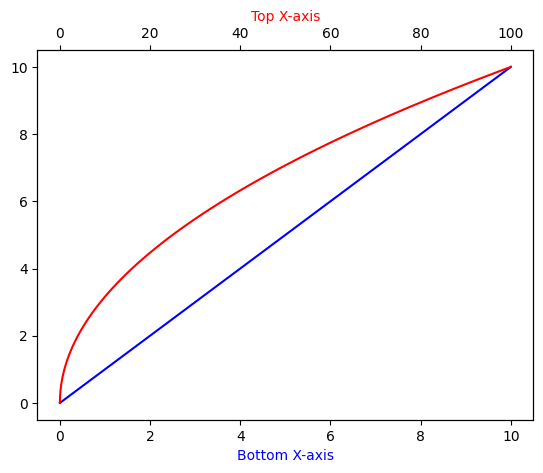

In [30]:
y = np.linspace(0, 10, 100)
x1 = y
x2 = y**2

fig, ax1 = plt.subplots()

# First x-axis (bottom)
ax1.plot(x1, y, 'b-')
ax1.set_xlabel('Bottom X-axis', color='b')

# Second x-axis (top)
ax2 = ax1.twiny()
ax2.plot(x2, y, 'r-')
ax2.set_xlabel('Top X-axis', color='r')


### Tips: xlim, ylim

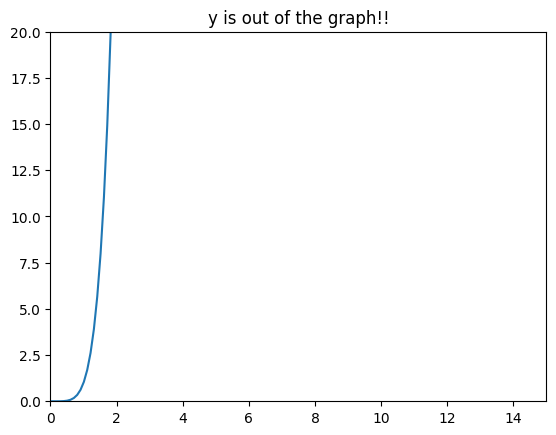

In [31]:
x = np.linspace(0, 10, 100)

plt.plot(x, x**5, label="linear") # linear

plt.xlim(0, 15)
plt.ylim(0, 20)

plt.title("y is out of the graph!!")
plt.show()

## barplot

In [32]:
groups = ["A", "B", "C"]
values = [10, 20, 30]

### Vertical bar

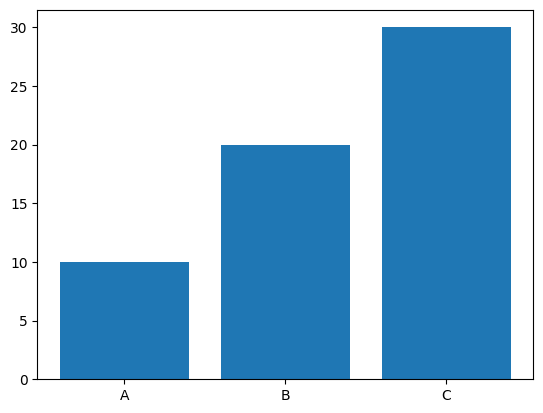

In [33]:
### vertical bar
plt.bar(groups, values)
plt.show()

### horizontal bar

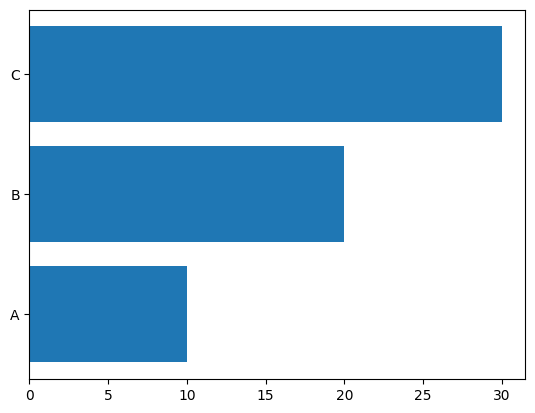

In [34]:
### horizontal bar
plt.barh(groups, values)
plt.show()

### pyramid plot

#### without ax reference

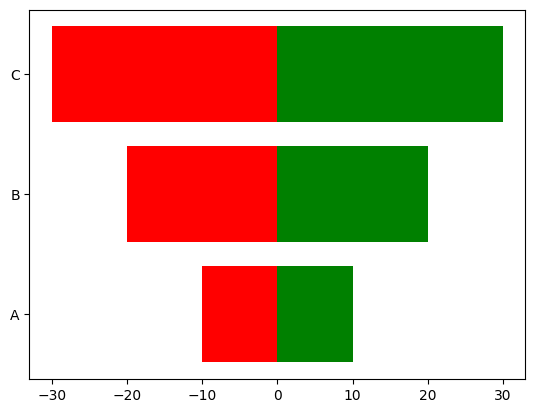

In [35]:
# what if we wanna do pyramid plot?
# Notice that it's not that hard but the key is at the x-axis
# See that the number is in negative
groups = ["A", "B", "C"]
values = [10, 20, 30]
plt.barh(groups, values, color="green")
plt.barh(groups, -1*np.array(values), color="red")
plt.show()

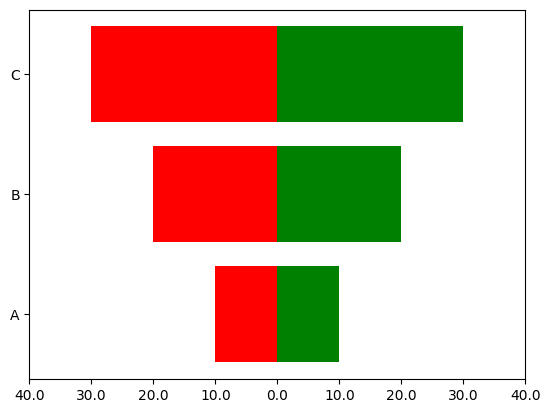

In [36]:
plt.barh(groups, values, color="green")
plt.barh(groups, -1*np.array(values), color="red")
mock_fig = plt.gcf()
xticks = mock_fig.gca().get_xticks()
new_xticks = [abs(x) for x in xticks]
plt.xticks(ticks=xticks, labels=new_xticks)
plt.show()

#### with ax reference

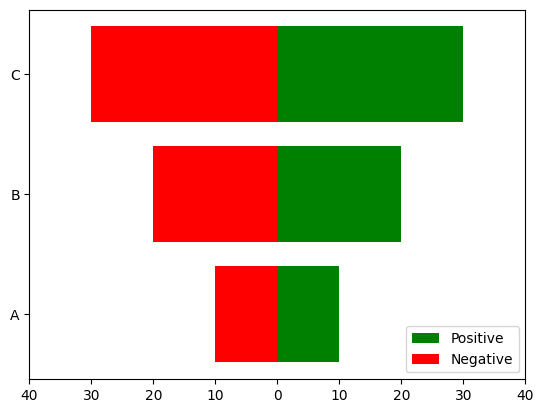

In [37]:
fig, ax = plt.subplots()

ax.barh(groups, values, color="green", label="Positive")
ax.barh(groups, -np.array(values), color="red", label="Negative")

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([f"{abs(t):.0f}" for t in ax.get_xticks()], rotation=0) # fun fact rotation is just an angle, so mostly 0-90 is fine.

ax.legend(loc=4)
plt.show()

In [38]:
# here is what ax.get_xticks() looks like, so our job is to convert it into absolute form (positive)
ax.get_xticks()

array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.])

#### Cool example!

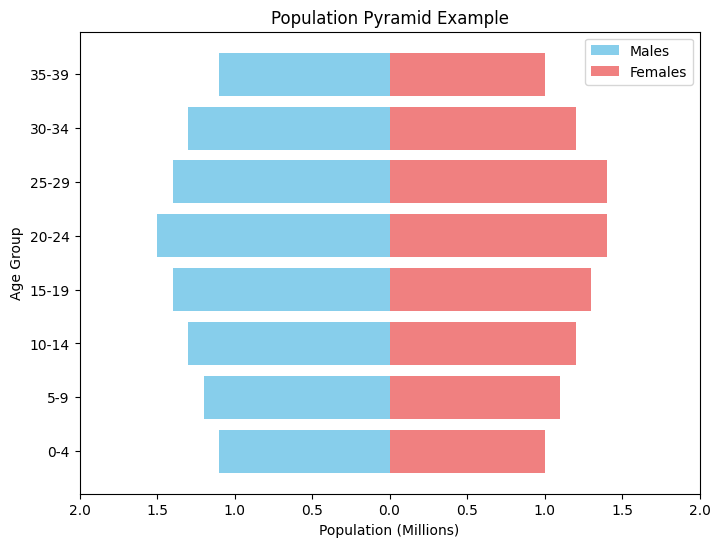

In [39]:
# Sample Data (Age groups, Male counts, Female counts)
# this is x-axis
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39']

# females and males are in y-axis

# we can define it as positive side
females = [1.0, 1.1, 1.2, 1.3, 1.4, 1.4, 1.2, 1.0]

# we can define it as negative side
# so we have to convert male data to negative for the left side of the plot
males = [1.1, 1.2, 1.3, 1.4, 1.5, 1.4, 1.3, 1.1]
males_negative = [-x for x in males]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6)) # ax is needed because we have to use it as reference
ax.barh(age_groups, males_negative, color='skyblue', label='Males')
ax.barh(age_groups, females, color='lightcoral', label='Females')

# Formatting the axes and labels
ax.set_xlabel('Population (Millions)')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid Example')
ax.legend()

# Fix the x-axis tick labels to show positive values
ax.set_xticks(ax.get_xticks()) # Get current ticks
ax.set_xticklabels([f'{abs(x)}' for x in ax.get_xticks()]) # the magic is here for the x-axis label!!

plt.show()